In [1]:
import pandas as pd
from dbanalysis import stop_tools

In [24]:
df = stop_tools.random_stop_data()

In [3]:
df.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'dt', 'date',
       'day', 'month', 'hour', 'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp',
       'vappr', 'wetb'],
      dtype='object')

In [25]:
df = pd.get_dummies(df,columns=['hour','day','month'])

In [26]:
df['traveltime']=df['actualtime_arr_to']-df['actualtime_arr_from']

In [27]:
df=df[df['traveltime']>0]

In [23]:
a=df[df['year']==2016]
a['year']=0

b=df[df['year']==2017]
b['year']=1

df = pd.concat([a,b],axis=0)

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [97]:
df['year'].max()

1

In [99]:
from sklearn import preprocessing
X,norms1 = preprocessing.normalize(df[features+['traveltime']],return_norm=True)


In [28]:
train = df[df['year']==2016]
test = df[df['year']==2017]

In [220]:
len(train)

18205

In [8]:
df.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'dt', 'date',
       'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [29]:
features = ['dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']

In [222]:
basic_features = ['hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']

In [223]:
features2 = ['rain','hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']

In [8]:
from sklearn.linear_model import LinearRegression as lr

In [32]:
train = df[df['year']==2016]
test = df[df['year']==2017]

In [33]:
rgr = lr(fit_intercept=True).fit(train[features],train['traveltime'])

In [37]:
preds = rgr.predict(train[features])
from sklearn import metrics
print(metrics.r2_score(train['traveltime'],preds))
print(((abs(train['traveltime']-preds)/train['traveltime'])*100).mean())
print(metrics.mean_absolute_error(train['traveltime'],preds))

0.06108807287083429
11.354675836343658
4.275239535075372


In [36]:
metrics.mean_absolute_error(train['traveltime'],preds)

4.275239535075372

In [253]:
preds = rgr.predict(test[features])
from sklearn import metrics
metrics.r2_score(test['traveltime'],preds)

0.20387039001798746

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: module 'seaborn' has no attribute 'plt'

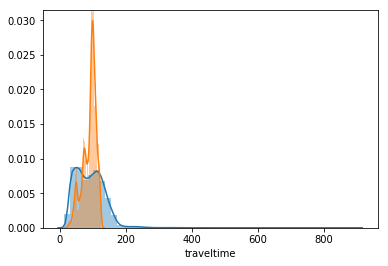

In [255]:
sns.distplot(test['traveltime'])
sns.distplot(preds)
sns.plt.show()

# Ok - so we ** can** get 0.2 on just linear regression

In [238]:
from sklearn.neural_network import MLPRegressor as NN


In [280]:
rgr = NN(activation='relu',learning_rate_init=0.00001,batch_size=100, solver='adam',\
         hidden_layer_sizes=(80,80,80,80)).fit(train[features],train['traveltime'])

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [165]:
rgr

MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40,), learning_rate='constant',
       learning_rate_init=1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [279]:
features = ['hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6']

In [281]:
preds=rgr.predict(test[features])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.2090564720508168
42.26702958226864


In [ ]:
# actually - this is kind of ok!

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: 'function' object has no attribute 'show'

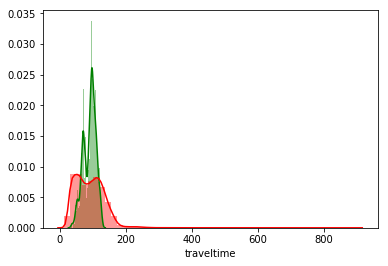

In [282]:
sns.distplot(preds,color='green')
sns.distplot(test['traveltime'],color='red')
sns.distplot.show()

In [290]:
rgr = NN(activation='relu',learning_rate_init=0.00001,batch_size=100, solver='adam',\
         hidden_layer_sizes=(80,80,80,80,80)).fit(train[features],train['traveltime'])
preds=rgr.predict(test[features])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.21331577455826856
41.81940804836937


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [292]:
rgr = NN(activation='relu',learning_rate_init=0.00001,batch_size=100, solver='adam',\
         hidden_layer_sizes=(80,80,80,80,80),\
         max_iter=400).fit(train[features],train['traveltime'])
preds=rgr.predict(test[features])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.22070011582462545
40.85684809164769


In [ ]:
# so doubling the number of iteration, only upped our r2_score by 0.1... And we still haven't matched
# the model that just predicts the average travel time

In [293]:
rgr = NN(activation='relu',learning_rate_init=0.00001,batch_size=100, solver='adam',\
         hidden_layer_sizes=(80,80,80,80,80,80),\
         max_iter=400).fit(train[features],train['traveltime'])
preds=rgr.predict(test[features])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.20799532783291785
41.50963702331734


In [ ]:
#worse with the extra layer!

In [302]:
rgr = NN(activation='relu',learning_rate_init=0.00001,batch_size=100, solver='adam',\
         hidden_layer_sizes=(80,80,80,80,80),\
         max_iter=500).fit(train[features+['rain','temp','dewpt']],train['traveltime'])
preds=rgr.predict(test[features+['rain','temp','dewpt']])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.2070000287464635
41.64571518200439


In [298]:
preds=rgr.predict(test[features+['rain']])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.2116079422281617
41.435052084039135


In [304]:
# these 6 or so cells aren't representative of the 2 hours I waited for various models to build.

# it seems quite difficult to push past the 0.2 r2 score mark. And that is that. C'est le science lugubre

# simple forest model - beat this etc

In [241]:
from sklearn.ensemble import RandomForestRegressor as rf

In [64]:
test['traveltime'].mean()

53.07822346097916

In [242]:
rgr = rf().fit(train[features],train['traveltime'])

In [247]:
preds=rgr.predict(test[features])
print(metrics.r2_score(test['traveltime'],preds))
print(((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())

0.1423403267972405
42.82048109953886


/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: module 'seaborn' has no attribute 'show'

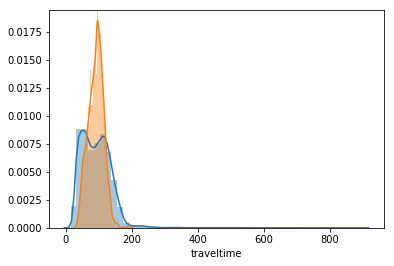

In [251]:
import seaborn as sns
sns.distplot(test['traveltime'])
sns.distplot(preds)
sns.show()

/home/student/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: 'AxesSubplot' object has no attribute 'show'

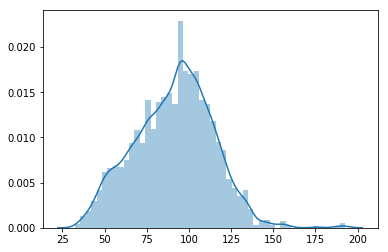

In [250]:
import seaborn as sns
sns.distplot(preds).show()

In [212]:
len(train)

13

In [38]:
features3=['actualtime_arr_from','rain','temp','hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6']

In [79]:
print('hello')

hello


In [283]:
df=stop_tools.random_stop_data()

In [287]:
to_concat = []
for day in df['day'].unique():
    tf = df[df['day']==day]
    for hour in tf['hour'].unique():
        rf=tf[tf['hour']==hour]
        rf['mean']=rf['traveltime'].mean()
        to_concat.append(rf)
df=pd.concat(to_concat,axis=0)
        

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [288]:
preds=df['mean']; reals=df['traveltime']
metrics.r2_score(reals,preds)

0.22927390511921464

In [289]:
((abs(reals - preds)/reals)*100).mean()

39.361601398100746